# World Analysis

<p>Autor: Rômulo Lima Gava <br>
Data: 09/12/2020<br>
Localização: São Paulo, Brazil</p>

Código para entender melhor o geopandas. <br>
Data set obtido no Kaggle: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv

## Setup:

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon
year=2010

## Functions

getandreset:<br>
inputs:
<ul><li>df: (dataframe)</li>
<li>column: name of a df column (string)</li>
<li>target: column element (string)</li></ul><br>
returns: df_temp: filtered dataframe with column=target with reseted index

In [144]:
def getandreset(df,column,target):
    """
    df: dataframe
    column: string
    target: string
    return: dataframe
    """
    df_temp=df.loc[(df[column]==target)]
    df_temp.reset_index(drop=True, inplace=True)
    return df_temp
    

mult_getandreset:<br>
inputs:
<ul><li>df: (dataframe)</li>
<li>column: name of a df column (string)</li>
<li>target: n elements from column in list format (list)</li></ul><br>
returns: df_temp: filtered dataframe with column=target with reseted index

In [145]:
def mult_getandreset(df,column,values):
    """
    df: dataframe
    column: string
    target: list
    return: dataframe
    """
    df_temp=df.loc[df[column].isin(values)]
    df_temp.reset_index(drop=True, inplace=True)
    return df_temp

## Main:

Steps:
<ol><li>read master.csv and create df</li>
<li>get year from df and create df_year</li>
<li>grup information in df_year by year and create df_group</li>
<li>select wich countries from dataframe we are going to analyse</li>
<li>filter df_group with these countries and create df_countries</li>
<li>rename country column in df_group to be the same from geopandas</li>
<li>import geopandas dataframe</li>
<li>correct some countries names</li>
<li>merge geopandas dataframe and df_group and create result</li>
<li>remove na from result and create result_final</li>
<li>plot world</li></ol>

In [146]:
df=pd.read_csv("Data/master.csv")
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [147]:
df_year=getandreset(df,column="year",target=year)
df_year.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
1,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
2,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
3,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
4,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [148]:
df_group=df_year.groupby(["country"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['country', 'year', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,24120,96,2736025,41.66,8.664,52308
1,Argentina,24120,2943,37578454,111.24,9.732,135276
2,Armenia,24120,73,2676225,40.41,8.652,41520
3,Aruba,24120,7,95006,58.65,0.000,311688
4,Australia,24120,2420,20847547,132.64,11.124,658644


In [149]:
countries=df['country'].value_counts()
# countries=countries[countries>100]
print(countries)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [150]:
df_country=mult_getandreset(df_year,'country',countries.index)
df_country.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
1,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
2,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
3,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
4,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [151]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

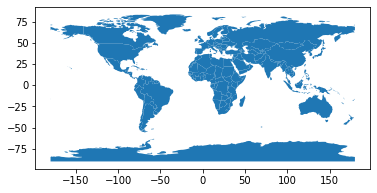

In [152]:
world.plot()

In [153]:
df_group=df_group.rename(columns={"country": "name"})
df_group.head()

,name,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,24120,96,2736025,41.66,8.664,52308
1,Argentina,24120,2943,37578454,111.24,9.732,135276
2,Armenia,24120,73,2676225,40.41,8.652,41520
3,Aruba,24120,7,95006,58.65,0.000,311688
4,Australia,24120,2420,20847547,132.64,11.124,658644


In [154]:
df_group["name"]= df_group["name"].replace("United States", "United States of America")
df_group["name"]= df_group["name"].replace("Russian Federation", "Russia")


In [155]:
result=pd.merge(world, df_group, how="left", on="name")
result.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",24120.0,3951.0,32286140.0,132.67,10.836,599688.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",24120.0,38362.0,287839149.0,158.89,10.908,623868.0


In [156]:
result_final=result.fillna(0)
result_final.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,0.0,0.0,0.00,0.000,0.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,0.0,0.0,0.00,0.000,0.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,0.0,0.0,0.00,0.000,0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",24120.0,3951.0,32286140.0,132.67,10.836,599688.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",24120.0,38362.0,287839149.0,158.89,10.908,623868.0


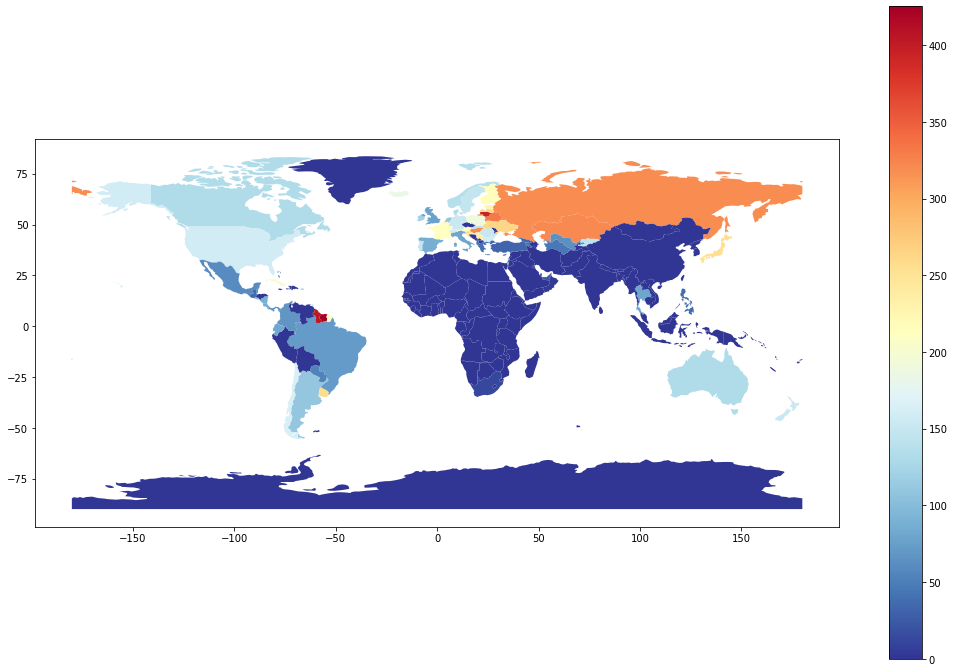

In [160]:
fig, ax = plt.subplots(1, 1)
fig=plt.gcf()
fig.set_size_inches(18,12)

result_final.plot(column='suicides/100k pop',ax=ax,legend=True,cmap='RdYlBu_r')
# plt.savefig('wolrd.jpg')

In [158]:
geo_countries=result_final['name'].value_counts()